In [25]:
import os 
import PIL 
import cv2 
from glob import glob 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
root_dir = '../data/hand_picked_videos/'

In [15]:
data = {'video': [], 'action': [], 'file type': [], '#frames': [], 'width': [], 'height': []}

for f in glob('../data/hand_picked_videos/*/*'):
    _, action, p  = f.split('\\')
    ID, ftype = '.'.join(p.split('.')[:-1]), p.split('.')[-1]
    print(action, '|', ID)
    data['video'].append(ID)
    data['file type'].append(ftype)
    data['action'].append(action) 

    # read video data
    cap = cv2.VideoCapture(f)
    if (cap.isOpened() == False): 
        print("Error reading video file")
    data['width'].append(int(cap.get(3)))
    data['height'].append(int(cap.get(4)))
    frames = 0
    while cap.isOpened():
        _, frame = cap.read()
        try:
            # convert the frame to RGB format
            RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames+=1 
        except Exception as inst:
            break
        if cv2.waitKey(1) == ord('q'):
            break
    cap.release()
    data['#frames'].append(frames)


car_drive | Lexus LFA Mountain Drive - Incredible V10 Sound (POV Binaural Audio)
car_drive | MAH00030 2
car_drive | Racing 101 Check your steering wheel
car_drive | Shuffle steering demonstration
car_drive | Toyota Premio ZRT260 POV Drive
folding_laundry | a049-1957C
folding_laundry | a049-1988C
folding_laundry | a049-2004C
folding_laundry | a049-2028C
folding_laundry | a049-2032C
folding_laundry | a049-2033C
folding_laundry | a049-2036C
going_down_stairs | a097-1157C
going_down_stairs | a097-1179C
going_down_stairs | a097-1187C
going_down_stairs | a097-1195C
going_down_stairs | a097-1196C
going_down_stairs | a097-1202C
going_up_stairs | a097-1185C
going_up_stairs | a097-1189C
going_up_stairs | a097-1191C
going_up_stairs | a097-1193C
going_up_stairs | a097-1199C
going_up_stairs | a097-1203C
house_cleaning | a055-1368C
house_cleaning | a055-1373C
house_cleaning | a055-1374C
house_cleaning | a055-1392C
house_cleaning | a055-1409C
house_cleaning | a055-1411C
house_cleaning | a055-1419C
ir

In [17]:
data_df = pd.DataFrame.from_dict(data)
data_df

,video,action,file type,#frames,width,height
0,Lexus LFA Mountain Drive - Incredible V10 Soun...,car_drive,mp4,295,1280,720
1,MAH00030 2,car_drive,mp4,215,1280,720
2,Racing 101 Check your steering wheel,car_drive,mp4,306,1280,720
3,Shuffle steering demonstration,car_drive,mp4,305,1280,720
4,Toyota Premio ZRT260 POV Drive,car_drive,mp4,304,1280,720
...,...,...,...,...,...,...
117,a031-1611C,watching_TV,mp4,180,1920,1080
118,a031-1623C(1),watching_TV,mp4,151,1920,1080
119,a031-1623C,watching_TV,mp4,151,1920,1080
120,a031-1629C(1),watching_TV,mp4,158,1920,1080


In [18]:
data_df['action'].value_counts()

watching_TV          12
using_computer       10
run                   9
jump                  8
walk                  7
folding_laundry       7
nordic_walk           7
house_cleaning        7
kick_ball             6
ironing               6
ride_bike             6
sitting_down          6
stand                 6
going_up_stairs       6
vacuum_cleaning       6
going_down_stairs     6
car_drive             5
lying_on_floor        2
Name: action, dtype: int64

In [20]:
data_df['file type'].value_counts()

mp4    80
avi    42
Name: file type, dtype: int64

In [52]:
data_df.value_counts(subset=['width', 'height'])

width  height
1920   1080      30
1280   720       29
320    240       14
1080   1920      10
416    240        6
352    240        5
432    240        5
720    1280       4
592    240        4
480    640        3
560    240        3
304    240        2
640    360        1
300    240        1
607    1080       1
360    640        1
324    240        1
312    240        1
480    272        1
dtype: int64

(array([ 2.,  0.,  0.,  3.,  1.,  3.,  4.,  0.,  2.,  0.,  2.,  3., 13.,
         2.,  1.,  0.,  1.,  1.,  3.,  1.,  2.,  4.,  0.,  1.,  1.,  1.,
         2.,  0., 30.,  1.,  7.,  5.,  2.,  1.,  7.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  5.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 21.        ,  25.55714286,  30.11428571,  34.67142857,
         39.22857143,  43.78571429,  48.34285714,  52.9       ,
         57.45714286,  62.01428571,  66.57142857,  71.12857143,
         75.68571429,  80.24285714,  84.8       ,  89.35714286,
         93.91428571,  98.47142857, 103.02857143, 107.58571429,
        112.14285714, 116.7       , 121.25714286, 125.81428571,
        130.37142857, 134.92857143, 139.48571429, 144.04285714,
        148.6       , 153.15714286, 157.71428571, 162.27142857,
        166.82857143, 171.38571429, 175.94285714, 180.5       ,
        185.05714286, 18

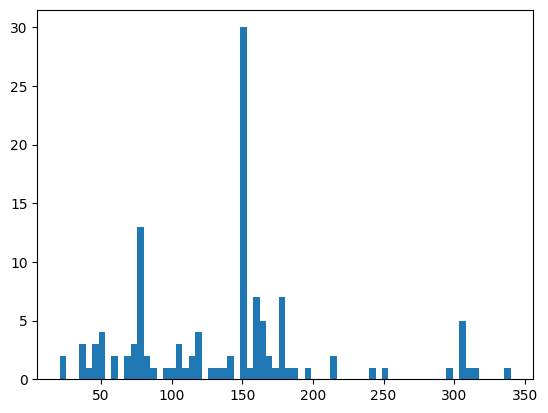

In [24]:
plt.hist(x=data_df['#frames'].values, bins=70)

<AxesSubplot:xlabel='#frames', ylabel='Count'>

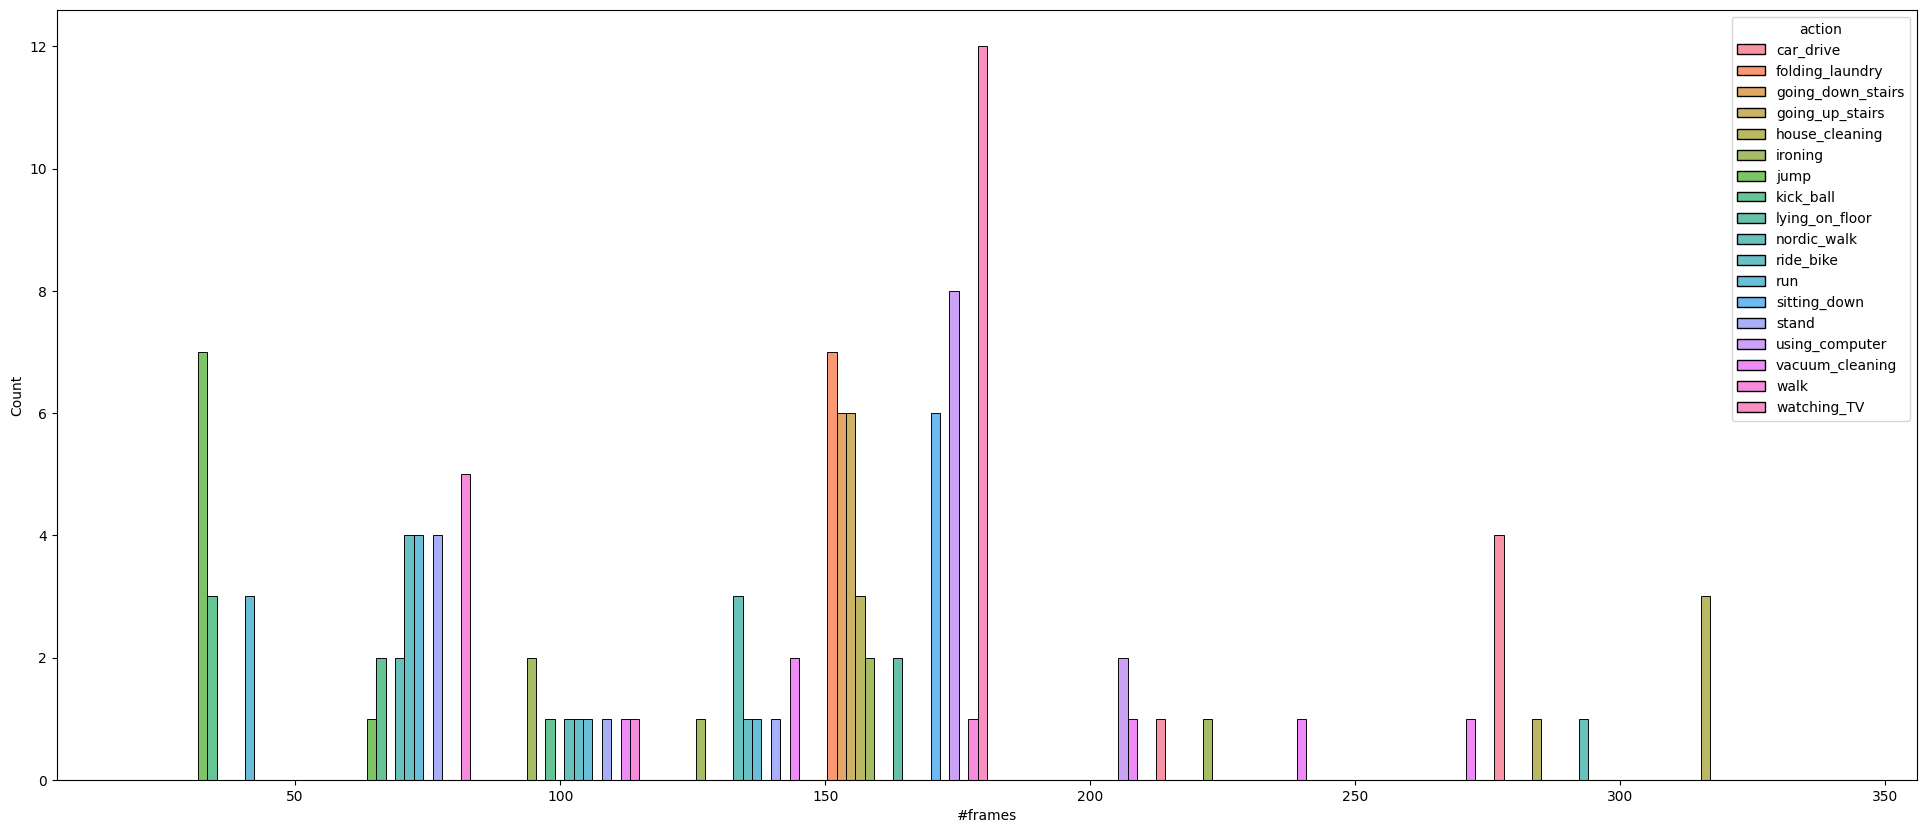

In [30]:
plt.figure(figsize=(24,10))
sns.histplot(data=data_df, x='#frames', multiple='dodge', hue='action')

In [31]:
import plotly.express as px

In [41]:
fig = px.histogram(data_df, x='#frames', color='action', barmode='group', width=1600, height=600)
fig.show()

In [47]:
fig = px.box(data_df, x="#frames", y="action", width=1000, height=800, orientation='h')
fig.show()